<span style="background: linear-gradient(to right, #ff7e5f, #feb47b); color: #ffffff; padding: 5px;">Importing Libraries</span>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<span style="color: #4CAF50; border: 2px solid #4CAF50; padding: 5px; border-radius: 5px;">Load Dataset </span>


In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df['sex']=df['sex'].map(lambda s:1 if s=='male' else 0)
df['smoker']=df['smoker'].map(lambda s:1 if s=='yes' else 0)
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [5]:
df.rename(columns = {'expenses':'charges'}, inplace= True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [6]:
print(df.shape)
print("\n")
print(df.info())
df.describe()

(1338, 7)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB
None


,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.665471,1.094918,0.204783,13270.422414
std,14.049960,0.500160,6.098382,1.205493,0.403694,12110.011240
min,18.000000,0.000000,16.000000,0.000000,0.000000,1121.870000
25%,27.000000,0.000000,26.300000,0.000000,0.000000,4740.287500
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.030000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,16639.915000
max,64.000000,1.000000,53.100000,5.000000,1.000000,63770.430000


In [7]:
corr = df.corr()
corr

C:\Users\Nehal\AppData\Local\Temp\ipykernel_13676\2438084875.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,age,sex,bmi,children,smoker,charges
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.299008
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,0.057292
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,0.198576
children,0.042469,0.017163,0.012645,1.000000,0.007673,0.067998
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,0.787251
charges,0.299008,0.057292,0.198576,0.067998,0.787251,1.000000


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

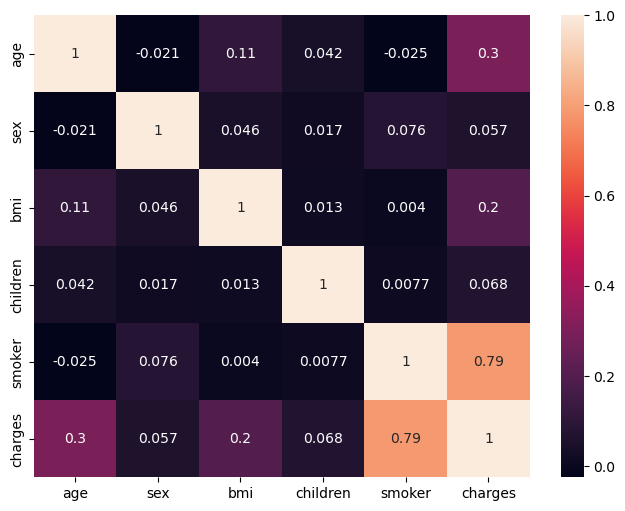

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot = True)
#annot = annotation of values - True
#if False it will not show values

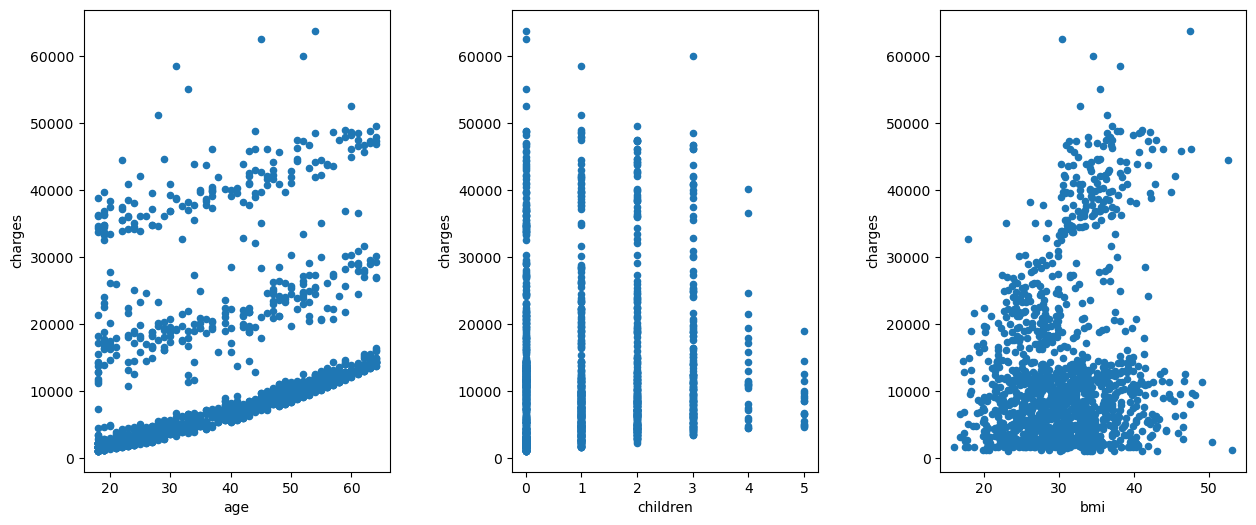

In [10]:
fig,axes = plt.subplots(ncols = 3, figsize = (15,6),squeeze = True)
df.plot(kind='scatter', x='age', y='charges', ax=axes[0])
df.plot(kind='scatter', x='children', y='charges', ax=axes[1])
df.plot(kind='scatter', x='bmi', y='charges', ax=axes[2])
plt.subplots_adjust(left = None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)


<Axes: ylabel='Frequency'>

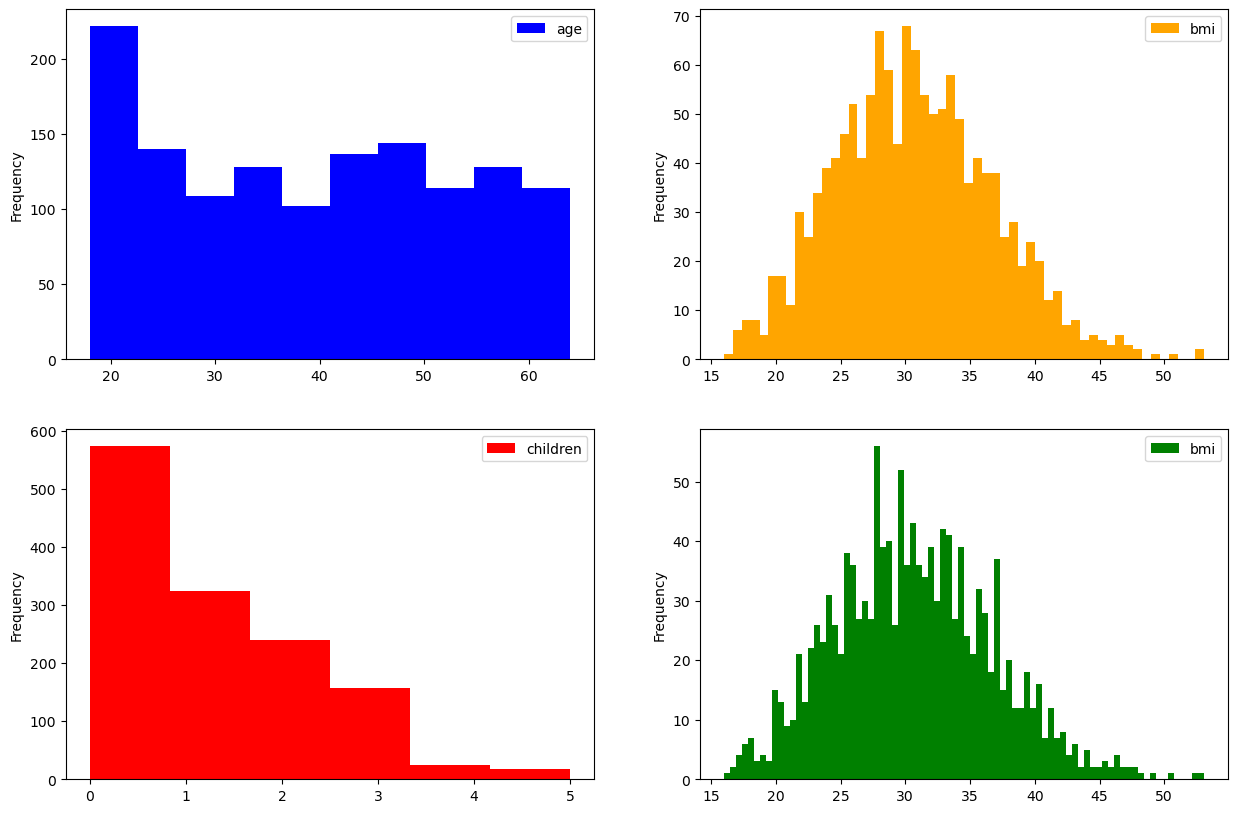

In [11]:
fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10))
df.plot(kind='hist', y='age', ax=axes[0][0],color='blue')
df.plot(kind='hist', y='bmi', ax=axes[0][1],color='orange', bins=54)
df.plot(kind='hist', y='children', ax=axes[1][0],color='red', bins=6)
df.plot(kind='hist', y='bmi', ax=axes[1][1],color='green', bins=80)

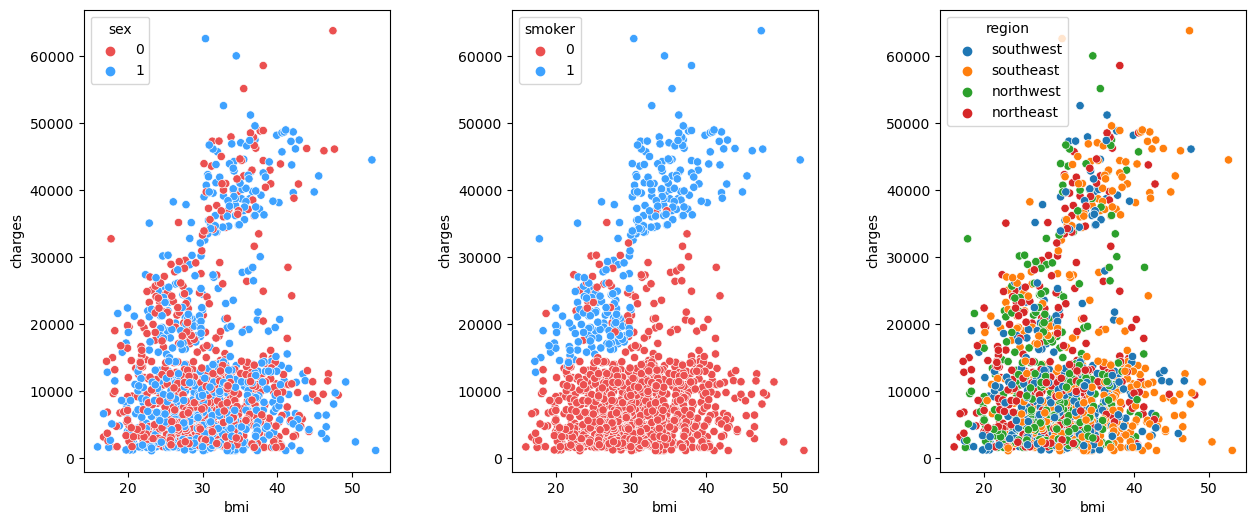

In [12]:
palette = ['#EB5050','#3EA2FF']
fig, axes=plt.subplots(ncols=3,figsize=(15,6),squeeze=True)
sns.scatterplot(x='bmi',y='charges',ax=axes[0],data=df,hue='sex',palette=palette)
sns.scatterplot(x='bmi',y='charges',ax=axes[1],data=df,hue='smoker',palette=palette)
sns.scatterplot(x='bmi',y='charges',ax=axes[2],data=df,hue='region')
fig.subplots_adjust(left = None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)

<Axes: title={'center': 'Smoker'}>

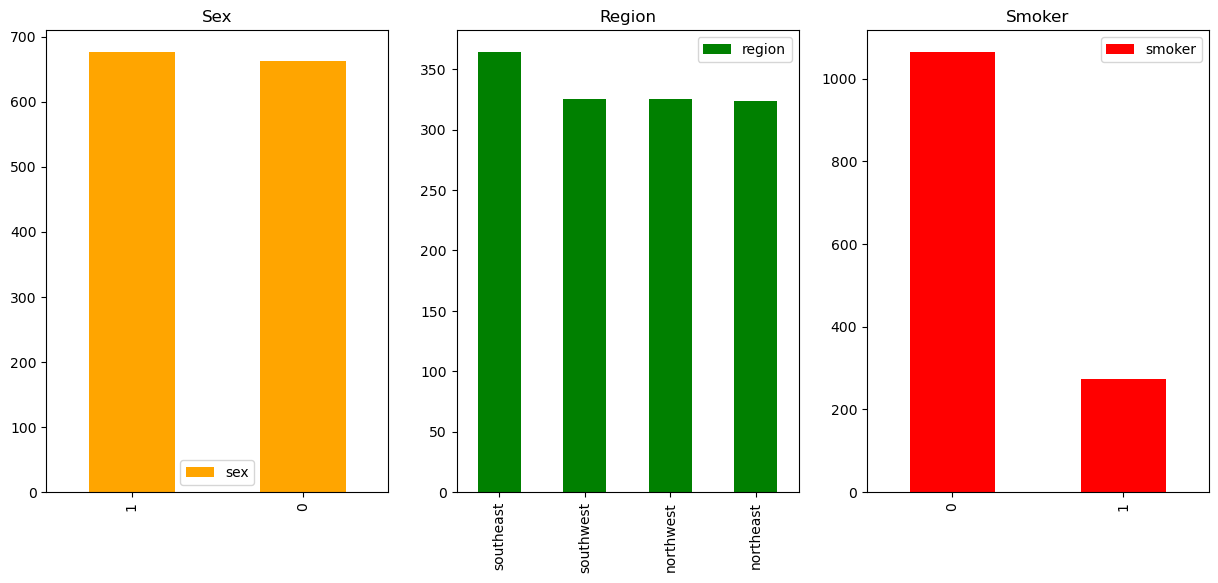

In [13]:
fig, axes = plt.subplots(ncols=3, figsize=(15,6))
df['sex'].value_counts().plot(kind='bar',color='orange',ax=axes[0],title='Sex',legend='sex')
df['region'].value_counts().plot(kind='bar',color='green',ax=axes[1],title='Region',legend='region')
df['smoker'].value_counts().plot(kind='bar',color='red',ax=axes[2],title='Smoker',legend='smoker')

C:\Users\Nehal\AppData\Local\Temp\ipykernel_13676\917037545.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'],fit=norm)


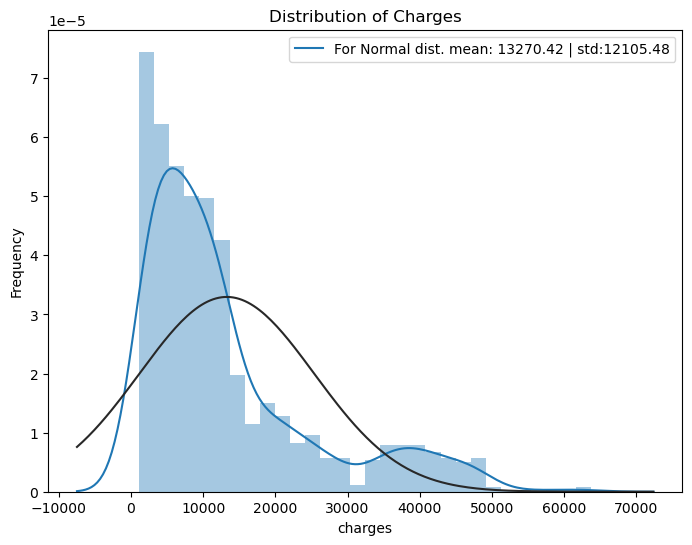

In [14]:
from scipy import stats
from scipy.stats import norm
fig =plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.distplot(df['charges'],fit=norm)
(mu,sigma)=norm.fit(df['charges'])
plt.legend(['For Normal dist. mean: {:.2f} | std:{:.2f}'.format(mu,sigma)])
plt.ylabel('Frequency')
plt.title('Distribution of Charges')
plt.show()

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [16]:
df.drop(['region'],axis=1,inplace=True)
df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.9,0,1,16884.92
1,18,1,33.8,1,0,1725.55
2,28,1,33.0,3,0,4449.46
3,33,1,22.7,0,0,21984.47
4,32,1,28.9,0,0,3866.86


In [17]:
X = df.drop(['charges'],axis=1)
y = df.charges
print('Shape of X:',X.shape)
print('Shape of y:',y.shape)

Shape of X: (1338, 5)
Shape of y: (1338,)


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [19]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test,y_test))

0.7952529674123328


In [24]:
results = pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})
results

,Actual,Predicted
578,9724.53,11456.260710
610,8547.69,9934.793123
569,45702.02,37778.385938
1034,12950.07,15858.505279
198,9644.25,6953.500191
...,...,...
574,13224.06,14430.265988
1174,4433.92,6701.983467
1327,9377.90,11141.700468
817,3597.60,7201.002180


In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
pd.DataFrame(X_train).head()


,0,1,2,3,4
0,-0.514853,-0.985155,-0.180051,-0.063607,-0.503736
1,1.548746,-0.985155,-1.399832,-0.892144,-0.503736
2,-1.439915,1.015069,-0.982538,-0.063607,-0.503736
3,-1.368757,-0.985155,-1.014638,-0.892144,1.985167
4,-0.941805,-0.985155,-1.367732,-0.892144,-0.503736


In [29]:
pd.DataFrame(y_train).head()

,charges
1075,4562.84
131,13616.36
15,1837.24
1223,26125.67
1137,3176.29


In [30]:
def model_summary(model, model_name, cvn=20):
    print(model_name)
    y_pred_model_train = model.predict(X_train)
    y_pred_model_test = model.predict(X_test)
    accuracy_model_train = r2_score(y_train, y_pred_model_train)
    print("Training Accuracy:", accuracy_model_train)
    accuracy_model_test = r2_score(y_test, y_pred_model_test)
    print("Testing Accuracy:", accuracy_model_test)


In [32]:
from math import sqrt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score,mean_squared_error

<span style="color: #4CAF50; border: 2px solid #4CAF50; padding: 5px; border-radius: 5px;">Training Model for Multiple Linear Regression </span>


In [33]:
from sklearn.linear_model import LinearRegression
multiple_linear_reg = LinearRegression(fit_intercept=False)
multiple_linear_reg.fit(X_train, y_train)
model_summary(multiple_linear_reg,"Multiple_linear_Regression")


Multiple_linear_Regression
Training Accuracy: -0.48955318862091035
Testing Accuracy: -0.35135313525903


<span style="color: #4CAF50; border: 2px solid #4CAF50; padding: 5px; border-radius: 5px;">Training Model for Support Vector regression </span>


In [34]:
from sklearn.linear_model import LinearRegression
multiple_linear_reg = LinearRegression(fit_intercept = False)
multiple_linear_reg.fit(X_train,y_train)
model_summary(multiple_linear_reg,"Multiple_linear_Regression")

Multiple_linear_Regression
Training Accuracy: -0.48955318862091035
Testing Accuracy: -0.35135313525903


<span style="color: #4CAF50; border: 2px solid #4CAF50; padding: 5px; border-radius: 5px;">Decision Tree regressor </span>


In [36]:
from sklearn.tree import DecisionTreeRegressor 
decision_tree_reg = DecisionTreeRegressor(max_depth = 5, random_state=13)
decision_tree_reg.fit(X_train,y_train)
model_summary(decision_tree_reg,"Decision_Tree_Regressor")

Decision_Tree_Regressor
Training Accuracy: 0.8694256881440832
Testing Accuracy: 0.8699569567957711


[Text(0.4979166666666667, 0.9166666666666666, 'x[4] <= 0.741\nsquared_error = 142893055.895\nsamples = 1003\nvalue = 13215.863'),
 Text(0.2625, 0.75, 'x[0] <= 0.232\nsquared_error = 37722601.958\nsamples = 800\nvalue = 8536.841'),
 Text(0.13333333333333333, 0.5833333333333334, 'x[0] <= -0.906\nsquared_error = 22884561.599\nsamples = 444\nvalue = 5416.66'),
 Text(0.06666666666666667, 0.4166666666666667, 'x[3] <= 0.351\nsquared_error = 24961248.888\nsamples = 197\nvalue = 3832.304'),
 Text(0.03333333333333333, 0.25, 'x[0] <= -1.191\nsquared_error = 20054511.927\nsamples = 166\nvalue = 3351.646'),
 Text(0.016666666666666666, 0.08333333333333333, 'squared_error = 17410006.45\nsamples = 118\nvalue = 2932.558'),
 Text(0.05, 0.08333333333333333, 'squared_error = 25062384.591\nsamples = 48\nvalue = 4381.905'),
 Text(0.1, 0.25, 'x[2] <= 0.005\nsquared_error = 43374237.869\nsamples = 31\nvalue = 6406.145'),
 Text(0.08333333333333333, 0.08333333333333333, 'squared_error = 56623360.089\nsamples = 

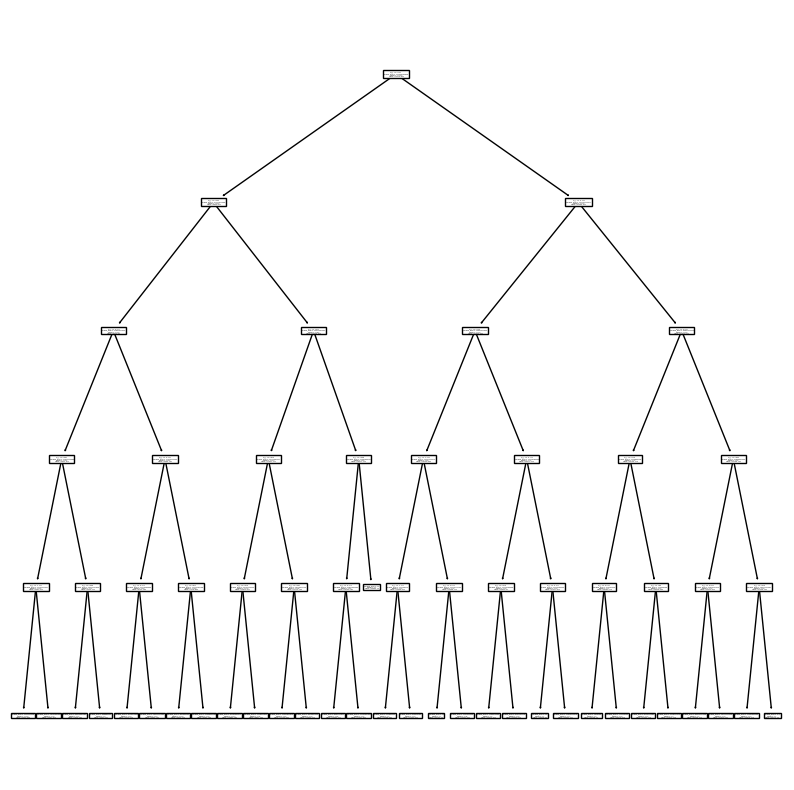

In [38]:
import sklearn
from sklearn import tree
fig, ax = plt.subplots(figsize = (10,10))
sklearn.tree.plot_tree(decision_tree_reg)

In [40]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(n_estimators=400,max_depth=5,random_state=13)
random_forest_reg.fit(X_train,y_train)
model_summary(random_forest_reg,'Random Forest Regression')

Random Forest Regression
Training Accuracy: 0.8782492884114315
Testing Accuracy: 0.8888521203684525
